In [1]:
%%capture
%load_ext autoreload
%autoreload 2
from setup_nb_env import *

from epsampling.utils import load_csv
pd.set_option('display.float_format', lambda x: '%6f' % x)
from epsampling.utils import drop_sers_with_nans
from epsampling.utils import date_str_to_int

DATA_DIR = '/work/users/k/4/k4thryn/Repos/EpSampling/data/'
DT = datetime.today().strftime('%Y%m%d-%H%M%S')

In [2]:
timestamp = '20241009-144131'

fpath = os.path.join(DATA_DIR,'processed', f'processed_naive_deaths_{timestamp}.csv')
df_deaths = pd.read_csv(fpath)
# display(df)

## Drop rows with nans.
df_deaths.dropna(inplace=True)
# display(df)

## Drop samples with negative inc deaths.
df_deaths = df_deaths[df_deaths.True_inc_deaths >= 0]
# display(df_deaths)

# # # # # # # # # # # # # # # # # # # #
# # # # # # # # # # # # # # # # # # # # 

from epsampling.utils import drop_duplicate_cols

fpath = os.path.join(DATA_DIR,'processed',f'formatted_acs_results_normed_{timestamp}.csv')
df_acs = pd.read_csv(fpath,index_col='Fips')

## Remove duplicate columns
df_acs = drop_duplicate_cols(df_acs)

## Remove correlated columns
# # # # # # # # # # # # # # 
# corr_thresh = 0.9
# # # # # # # # # # # # # # 
# corr_matrix = df_acs.corr().abs()
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# to_drop = [column for column in upper.columns if any(upper[column] > corr_thresh)]
# df_acs = df_acs.drop(to_drop, axis=1, inplace=False)

## Standardize
df_acs=(df_acs-df_acs.mean())/df_acs.std()

# Merge
df = df_deaths.merge(df_acs, on='Fips')
display(df)

# Adjust population-based outcomes
df['Target'] = df.apply(lambda x: (x.True_inc_deaths+1) / x.Pop * 100000, axis=1)
df['Naive'] = df.apply(lambda x: (x.Naive_inc_deaths+1) / x.Pop * 100000, axis=1)
df['State'] = df.apply(lambda x: (x.Proj_inc_deaths+1) / x.State_pop * 100000, axis=1)
df['Cumtm1'] = df.apply(lambda x: (x.Cum_deaths_tm1+1) / x.Pop * 100000, axis=1)

print(df['Target'].describe())

,Fips,State_fips,Pop,State_pop,Ratio,Date,Proj_inc_deaths,True_cum_deaths,Cum_deaths_tm1,True_inc_deaths,...,HU_OCC,POP_NH,HINS_A0018,HINS_A65p,HH_x5,POP_A3564,HU_x14,POP_16p_EMP_x7,POP_A25p,POP_x2
0,1001,1,58239.000000,4997675,0.011653,20200620,83.302156,9.000000,6.000000,3.000000,...,0.793727,0.481868,0.794219,0.318318,-0.147691,-0.134211,-0.155939,-0.148767,-0.141173,-0.140801
1,1001,1,58239.000000,4997675,0.011653,20200627,68.179357,12.000000,9.000000,3.000000,...,0.793727,0.481868,0.794219,0.318318,-0.147691,-0.134211,-0.155939,-0.148767,-0.141173,-0.140801
2,1001,1,58239.000000,4997675,0.011653,20200704,76.238975,13.000000,12.000000,1.000000,...,0.793727,0.481868,0.794219,0.318318,-0.147691,-0.134211,-0.155939,-0.148767,-0.141173,-0.140801
3,1001,1,58239.000000,4997675,0.011653,20200711,88.362530,15.000000,13.000000,2.000000,...,0.793727,0.481868,0.794219,0.318318,-0.147691,-0.134211,-0.155939,-0.148767,-0.141173,-0.140801
4,1001,1,58239.000000,4997675,0.011653,20200718,114.279381,21.000000,15.000000,6.000000,...,0.793727,0.481868,0.794219,0.318318,-0.147691,-0.134211,-0.155939,-0.148767,-0.141173,-0.140801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304412,56045,56,6891.000000,576641,0.011950,20220409,8.000000,18.000000,18.000000,0.000000,...,-0.151876,0.566402,-1.771829,0.515204,-0.306096,-0.288444,-0.313782,-0.287296,-0.292354,-0.293789
304413,56045,56,6891.000000,576641,0.011950,20220416,5.000000,18.000000,18.000000,0.000000,...,-0.151876,0.566402,-1.771829,0.515204,-0.306096,-0.288444,-0.313782,-0.287296,-0.292354,-0.293789
304414,56045,56,6891.000000,576641,0.011950,20220423,4.000000,18.000000,18.000000,0.000000,...,-0.151876,0.566402,-1.771829,0.515204,-0.306096,-0.288444,-0.313782,-0.287296,-0.292354,-0.293789
304415,56045,56,6891.000000,576641,0.011950,20220430,4.000000,18.000000,18.000000,0.000000,...,-0.151876,0.566402,-1.771829,0.515204,-0.306096,-0.288444,-0.313782,-0.287296,-0.292354,-0.293789


count   304417.000000
mean        13.927837
std         44.504360
min          0.022898
25%          3.212697
50%          6.889075
75%         14.112334
max       2409.638554
Name: Target, dtype: float64


In [3]:
from epsampling.utils import get_chunks
chunks = get_chunks(list(df.Date.unique()), 4)

# idc = [2,10,18]
# idc = [10]

# for idx in idc:
    
idx = 18 #10

dates_test = chunks[idx]
dates_train = [x for x in df.Date.unique() if x not in dates_test]

df_train = df[df.Date.isin(dates_train)]
df_test = df[df.Date.isin(dates_test)]

feats = list(df_acs.columns) + ['State','Cumtm1','Naive',
                                'State_pop','Ratio','Pop',
                                'State_fips'
                               ]
# print(feats)

X_train = df_train[feats]
X_test = df_test[feats]

y_train = df_train['Target']
y_test = df_test['Target']

y_naive = df_test['Naive']

print(X_train.shape)

(292085, 165)


Iteration 1, loss = 241734981333.55172729
Iteration 2, loss = 16371792936.36009026
Iteration 3, loss = 1804782380.32715988
Iteration 4, loss = 141769529.80306154
Iteration 5, loss = 15890606.99906084
Iteration 6, loss = 1305115.87805193
Iteration 7, loss = 118088.55895796
Iteration 8, loss = 12434.04175944
Iteration 9, loss = 2383.40486010
Iteration 10, loss = 1256.17617587
Iteration 11, loss = 1175.55504156
Iteration 12, loss = 1164.22438452
Iteration 13, loss = 1160.61700109
Iteration 14, loss = 1158.94852377
Iteration 15, loss = 1156.66108813
Iteration 16, loss = 1154.99968283
Iteration 17, loss = 1153.42892577
Iteration 18, loss = 1150.22323962
Iteration 19, loss = 1147.87059025
Iteration 20, loss = 1145.54491110
Iteration 21, loss = 1143.29370957
Iteration 22, loss = 1140.60457774
Iteration 23, loss = 1138.06290835
Iteration 24, loss = 1135.40782364
Iteration 25, loss = 1132.42409339
Iteration 26, loss = 1130.15523737
Iteration 27, loss = 1126.68832274
Iteration 28, loss = 1125.05

CPU times: user 3min 15s, sys: 1.8 s, total: 3min 17s
Wall time: 3min 18s


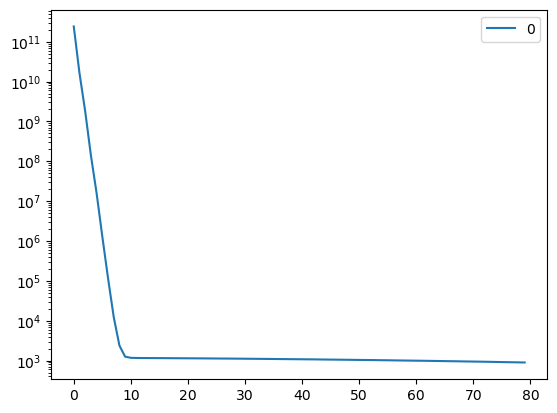

In [8]:
%%time

from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

reg = MLPRegressor(random_state=666, 
                   activation='identity',
                   solver='adam',
                   hidden_layer_sizes=(256,8),
                   max_iter=80, 
                   batch_size=12800,
                   shuffle=True,
#                    alpha = 0.01,
                   verbose=1)
reg.fit(X_train, y_train)

# regr.predict(X_test[:2])
# regr.score(X_test, y_test)

pd.DataFrame(reg.loss_curve_).plot(logy=True)
display()

allDone()

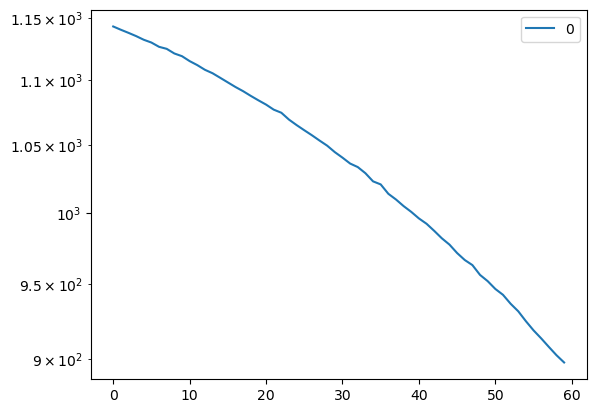

In [13]:
pd.DataFrame(reg.loss_curve_[20:]).plot(logy=True)
display()


In [12]:
from epsampling.utils import get_performance

## TRAINING SET PERFORMANCE

y_pred = reg.predict(X_train)
y_naive = df_train['Naive']

model_names = ['Deaths_pred', 'Deaths_naive']
model_preds = [y_pred, y_naive]

metrics_dict = get_performance(model_names, model_preds, y_train, y_naive)
display(metrics_dict)


## TEST SET PERFORMANCE

# y_pred = reg.predict(X_test)
# y_naive = df_test['Naive']

# model_names = ['Deaths_pred', 'Deaths_naive']
# model_preds = [y_pred, y_naive]

# metrics_dict = get_performance(model_names, model_preds, y_test, y_naive)
# display(metrics_dict)

{'Deaths_pred': {'MAE': 19.27873545274156,
  'MedAE': 14.115511480660249,
  'MSE': 1792.1298934655024,
  'RMSE': 42.33355517158348,
  'r2': 0.08417710032311077,
  'relMAE': 51376648719393.74,
  'relMedAE': 6.8686679901942345},
 'Deaths_naive': {'MAE': 3.5867293300082963,
  'MedAE': 1.5966422613244298,
  'MSE': 80.1104026252862,
  'RMSE': 8.9504414765578,
  'r2': 0.9590615939759252,
  'relMAE': 0.9989626307410514,
  'relMedAE': 1.0}}